<a href="https://colab.research.google.com/github/nathon-tadeo/Intro-to-ML/blob/main/homework_6_intro_to_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import time
from collections import OrderedDict

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

Epoch 50/200, Train Loss: 26279082459136.0000, Val Loss: 24997831639040.0000
Epoch 100/200, Train Loss: 25443753263104.0000, Val Loss: 24185740984320.0000
Epoch 150/200, Train Loss: 23893156823040.0000, Val Loss: 22691683762176.0000
Epoch 200/200, Train Loss: 21750251257856.0000, Val Loss: 20636571271168.0000

Training Time: 0.28 seconds
Validation MSE: 20636573368320.0000
Validation R² Score: -6.1617


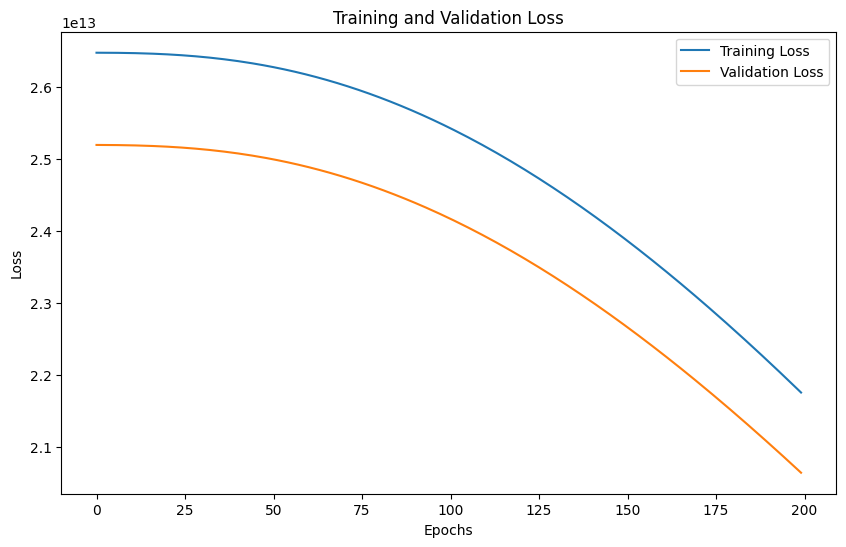

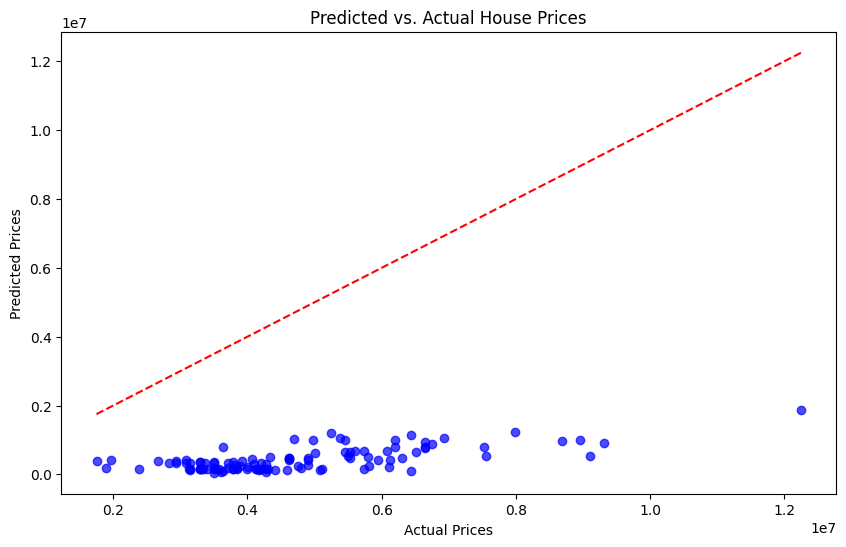

In [4]:
#Problem 1 (30 pts):
#1a. Build a fully connected neural network for the housing dataset you did in previous homework
#For this part, only use one hidden layer with 8 nodes

# Load the dataset
URL = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'
housing = pd.read_csv(URL)

# Convert categorical variables to binary
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[varlist] = housing[varlist].apply(binary_map)

# Define input features and target variable
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
             'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = housing['price']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Neural Network Class
class HousingNN(nn.Module):
    def __init__(self, input_size):
        super(HousingNN, self).__init__()
        self.model = nn.Sequential(OrderedDict([
            ('hidden_layer', nn.Linear(input_size, 8 )),  # One hidden layer with 8 nodes
            ('activation', nn.ReLU()),                  # ReLU activation after the hidden layer
            ('output_layer', nn.Linear(8 , 1))           # Output layer with 1 node
        ]))

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
input_size = X_train_tensor.shape[1]
model = HousingNN(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.5)

# Training loop
def training_loop(n_epochs, optimizer, model, loss_fn, X_train, X_val, y_train, y_val):
    train_losses, val_losses = [], []
    start_time = time.time()

# Training phase
    for epoch in range(1, n_epochs + 1):
        model.train()
        optimizer.zero_grad()
        predictions = model(X_train)
        train_loss = loss_fn(predictions, y_train)
        train_loss.backward()
        optimizer.step()
        train_losses.append(train_loss.item())

        # Validation phase
        model.eval()
        with torch.no_grad():
            val_predictions = model(X_val)
            val_loss = loss_fn(val_predictions, y_val)
            val_losses.append(val_loss.item())

        # Print progress every 50 epochs
        if epoch % 50 == 0 or epoch == n_epochs:
            print(f"Epoch {epoch}/{n_epochs}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

    total_time = time.time() - start_time
    return train_losses, val_losses, total_time

# Train the model
train_losses, val_losses, training_time = training_loop(
    n_epochs=200,
    optimizer=optimizer,
    model=model,
    loss_fn=criterion,
    X_train=X_train_tensor,
    X_val=X_test_tensor,
    y_train=y_train_tensor,
    y_val=y_test_tensor
)

print(f"\nTraining Time: {training_time:.2f} seconds")

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    mse = mean_squared_error(y_test_tensor.numpy(), y_pred.numpy())
    r2 = r2_score(y_test_tensor.numpy(), y_pred.numpy())

print(f"Validation MSE: {mse:.4f}")
print(f"Validation R² Score: {r2:.4f}")

# Training and validation losses
fig = plt.figure(figsize=(10, 6))
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Predictions vs Actual Prices
fig = plt.figure(figsize=(10, 6))
plt.scatter(y_test_tensor.numpy(), y_pred.numpy(), alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual House Prices")
plt.show()

Epoch 50/500, Train Loss: 19361683210240.0000, Val Loss: 17873653202944.0000
Epoch 100/500, Train Loss: 2787402055680.0000, Val Loss: 2346478469120.0000
Epoch 150/500, Train Loss: 1505426014208.0000, Val Loss: 1108709998592.0000
Epoch 200/500, Train Loss: 1188781359104.0000, Val Loss: 991383322624.0000
Epoch 250/500, Train Loss: 1124090249216.0000, Val Loss: 978569658368.0000
Epoch 300/500, Train Loss: 1087104024576.0000, Val Loss: 968136327168.0000
Epoch 350/500, Train Loss: 1062819332096.0000, Val Loss: 964694769664.0000
Epoch 400/500, Train Loss: 1044580401152.0000, Val Loss: 959174082560.0000
Epoch 450/500, Train Loss: 1028665442304.0000, Val Loss: 953256312832.0000
Epoch 500/500, Train Loss: 1016315707392.0000, Val Loss: 949774450688.0000

Training Time: 2.07 seconds
Validation MSE: 949774516224.0000
Validation R² Score: 0.6704


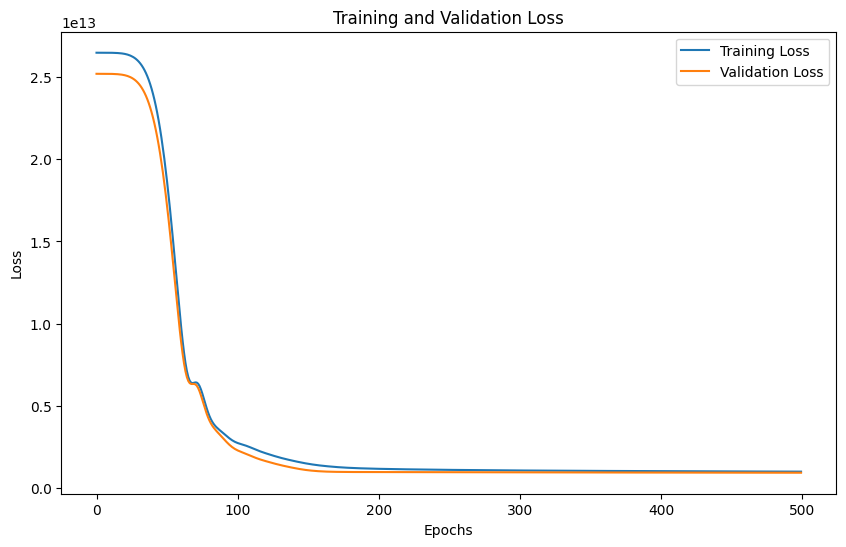

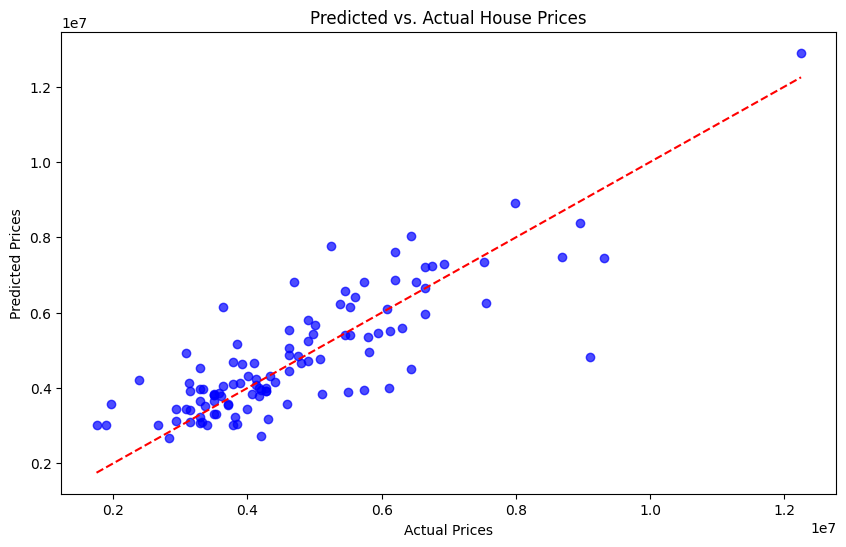

In [5]:
#1b Define the Fully Connected Neural Network with two additional hidden layers
class HousingNN(nn.Module):
    def __init__(self, input_size):
        super(HousingNN, self).__init__()
        self.model = nn.Sequential(OrderedDict([
            ('hidden_layer1', nn.Linear(input_size, 16)), # First hidden layer with 16 nodes
            ('activation1', nn.ReLU()),                   # First layer ReLU activation
            ('hidden_layer2', nn.Linear(16, 12)),         # Second hidden layer with 12 nodes
            ('activation2', nn.ReLU()),                   # Second layer ReLU activation
            ('hidden_layer3', nn.Linear(12, 8)),          # Third hidden layer with 8 nodes
            ('activation3', nn.ReLU()),                   # Third layer ReLU activation
            ('output_layer', nn.Linear(8, 1))             # Output layer with 1 node
        ]))

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
input_size = X_train_tensor.shape[1]
model = HousingNN(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Train the model
train_losses, val_losses, training_time = training_loop(
    n_epochs=500,
    optimizer=optimizer,
    model=model,
    loss_fn=criterion,
    X_train=X_train_tensor,
    X_val=X_test_tensor,
    y_train=y_train_tensor,
    y_val=y_test_tensor
)
print(f"\nTraining Time: {training_time:.2f} seconds")

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    mse = mean_squared_error(y_test_tensor.numpy(), y_pred.numpy())
    r2 = r2_score(y_test_tensor.numpy(), y_pred.numpy())

print(f"Validation MSE: {mse:.4f}")
print(f"Validation R² Score: {r2:.4f}")


# Training and validation losses
fig = plt.figure(figsize=(10, 6))
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Predictions vs Actual Prices
fig = plt.figure(figsize=(10, 6))
plt.scatter(y_test_tensor.numpy(), y_pred.numpy(), alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual House Prices")
plt.show()


Epoch 50/500, Train Loss: 0.0421, Val Loss: 0.1267
Epoch 100/500, Train Loss: 0.0195, Val Loss: 0.1035
Epoch 150/500, Train Loss: 0.0091, Val Loss: 0.0969
Epoch 200/500, Train Loss: 0.0046, Val Loss: 0.1006
Epoch 250/500, Train Loss: 0.0025, Val Loss: 0.1108
Epoch 300/500, Train Loss: 0.0015, Val Loss: 0.1207
Epoch 350/500, Train Loss: 0.0010, Val Loss: 0.1309
Epoch 400/500, Train Loss: 0.0007, Val Loss: 0.1382
Epoch 450/500, Train Loss: 0.0006, Val Loss: 0.1453
Epoch 500/500, Train Loss: 0.0004, Val Loss: 0.1514

Training Time: 0.81 seconds
Test Accuracy: 0.9649


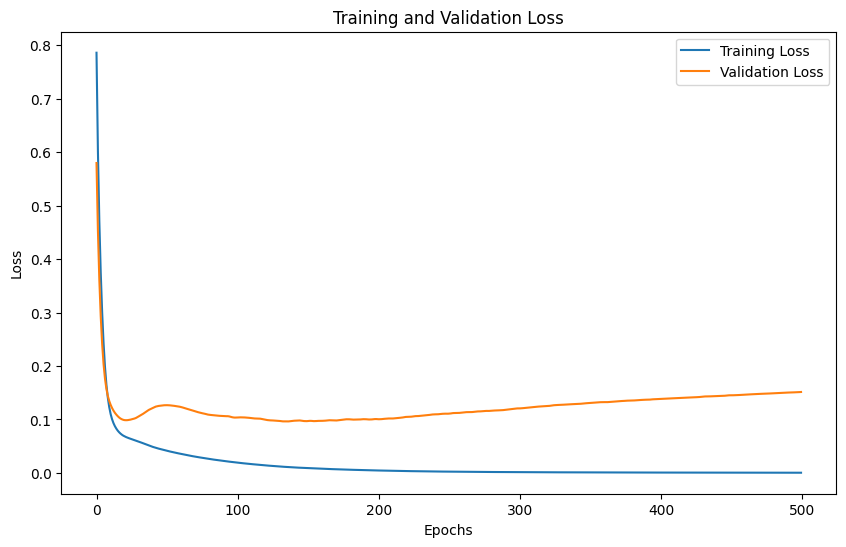

In [14]:
#2a. For this part, only use one hidden layer with 32 nodes

# Load the dataset
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
Y = breast.target

# Split the data into training (80%) and test (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)  # Long for classification
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

# Neural Network Class
class CancerNN(nn.Module):
    def __init__(self, input_size):
        super(CancerNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 32),  # Hidden layer with 32 nodes
            nn.ReLU(),                 # ReLU activation
            nn.Linear(32, 2)           # Output layer with 2 classes
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
input_size = X_train_tensor.shape[1]
model = CancerNN(input_size)
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
def training_loop(n_epochs, optimizer, model, loss_fn, X_train, X_val, y_train, y_val):
    train_losses, val_losses = [], []
    start_time = time.time()

    for epoch in range(1, n_epochs + 1):
        # Training phase
        model.train()
        optimizer.zero_grad()
        predictions = model(X_train)
        train_loss = loss_fn(predictions, y_train)
        train_loss.backward()
        optimizer.step()
        train_losses.append(train_loss.item())

        # Validation phase
        model.eval()
        with torch.no_grad():
            val_predictions = model(X_val)
            val_loss = loss_fn(val_predictions, y_val)
            val_losses.append(val_loss.item())

        # Print progress every 50 epochs
        if epoch % 50 == 0 or epoch == n_epochs:
            print(f"Epoch {epoch}/{n_epochs}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

    total_time = time.time() - start_time
    return train_losses, val_losses, total_time

# Train the model
train_losses, val_losses, training_time = training_loop(
    n_epochs=500,
    optimizer=optimizer,
    model=model,
    loss_fn=criterion,
    X_train=X_train_tensor,
    X_val=X_test_tensor,
    y_train=Y_train_tensor,
    y_val=Y_test_tensor
)

print(f"\nTraining Time: {training_time:.2f} seconds")

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_labels = torch.argmax(y_pred, axis=1)
    accuracy = accuracy_score(Y_test, y_pred_labels.numpy())

print(f"Test Accuracy: {accuracy:.4f}")

# Training and validation losses
fig = plt.figure(figsize=(10, 6))
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()



Epoch 50/500, Train Loss: 0.0389, Val Loss: 0.1191
Epoch 100/500, Train Loss: 0.0147, Val Loss: 0.0987
Epoch 150/500, Train Loss: 0.0058, Val Loss: 0.1020
Epoch 200/500, Train Loss: 0.0027, Val Loss: 0.1138
Epoch 250/500, Train Loss: 0.0015, Val Loss: 0.1296
Epoch 300/500, Train Loss: 0.0010, Val Loss: 0.1460
Epoch 350/500, Train Loss: 0.0007, Val Loss: 0.1603
Epoch 400/500, Train Loss: 0.0005, Val Loss: 0.1727
Epoch 450/500, Train Loss: 0.0004, Val Loss: 0.1833
Epoch 500/500, Train Loss: 0.0003, Val Loss: 0.1921

Training Time: 2.27 seconds
Test Accuracy: 0.9561


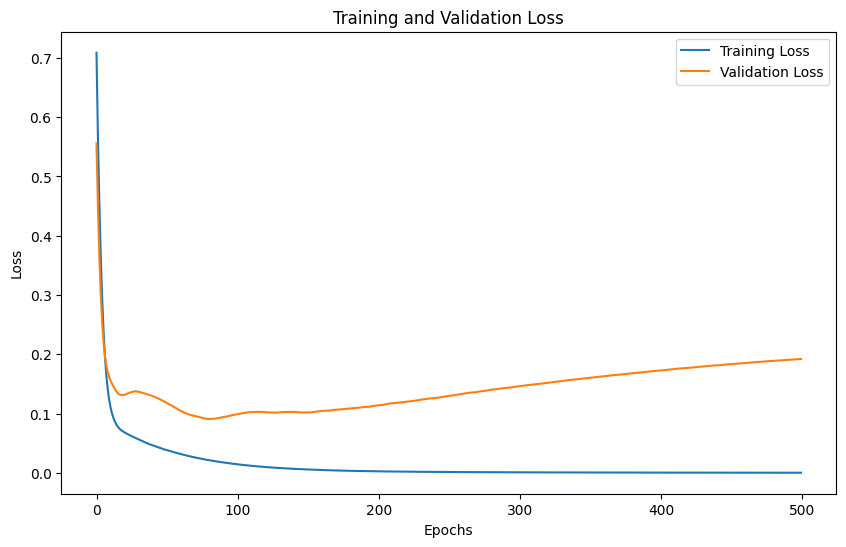

In [12]:
#2b. Extend your network with two more additional hidden layers
class ExtendedCancerNN(nn.Module):
    def __init__(self, input_size):
        super(ExtendedCancerNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 32), # First hidden layer
            nn.ReLU(),                 # First layer ReLU activation
            nn.Linear(32, 32),         # Second hidden layer
            nn.ReLU(),                 # Second layer ReLU activation
            nn.Linear(32, 32),         # Third hidden layer
            nn.ReLU(),                 # Third layer ReLU activation
            nn.Linear(32, 2)           # Output layer with 2 classes
        )

# Initialize the model, loss function, and optimizer
input_size = X_train_tensor.shape[1]
model = CancerNN(input_size)
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
def training_loop(n_epochs, optimizer, model, loss_fn, X_train, X_val, y_train, y_val):
    train_losses, val_losses = [], []
    start_time = time.time()

    for epoch in range(1, n_epochs + 1):
        # Training phase
        model.train()
        optimizer.zero_grad()
        predictions = model(X_train)
        train_loss = loss_fn(predictions, y_train)
        train_loss.backward()
        optimizer.step()
        train_losses.append(train_loss.item())

        # Validation phase
        model.eval()
        with torch.no_grad():
            val_predictions = model(X_val)
            val_loss = loss_fn(val_predictions, y_val)
            val_losses.append(val_loss.item())

        # Print progress every 50 epochs
        if epoch % 50 == 0 or epoch == n_epochs:
            print(f"Epoch {epoch}/{n_epochs}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

    total_time = time.time() - start_time
    return train_losses, val_losses, total_time

# Train the model
train_losses, val_losses, training_time = training_loop(
    n_epochs=500,
    optimizer=optimizer,
    model=model,
    loss_fn=criterion,
    X_train=X_train_tensor,
    X_val=X_test_tensor,
    y_train=Y_train_tensor,
    y_val=Y_test_tensor
)

print(f"\nTraining Time: {training_time:.2f} seconds")

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_labels = torch.argmax(y_pred, axis=1)
    accuracy = accuracy_score(Y_test, y_pred_labels.numpy())

print(f"Test Accuracy: {accuracy:.4f}")

# Training and validation losses
fig = plt.figure(figsize=(10, 6))
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Files already downloaded and verified
Files already downloaded and verified

Training the Neural Network...
Epoch [1/100], Loss: 1.6442, Accuracy: 0.4677
Epoch [11/100], Loss: 0.9664, Accuracy: 0.5143
Epoch [21/100], Loss: 0.6640, Accuracy: 0.5132
Epoch [31/100], Loss: 0.4809, Accuracy: 0.5105
Epoch [41/100], Loss: 0.3587, Accuracy: 0.4997
Epoch [51/100], Loss: 0.2855, Accuracy: 0.4906
Epoch [61/100], Loss: 0.2411, Accuracy: 0.5001
Epoch [71/100], Loss: 0.2311, Accuracy: 0.5004
Epoch [81/100], Loss: 0.2083, Accuracy: 0.4951
Epoch [91/100], Loss: 0.1802, Accuracy: 0.4845
Epoch [100/100], Loss: 0.1488, Accuracy: 0.4889

Training Time: 2037.51 seconds


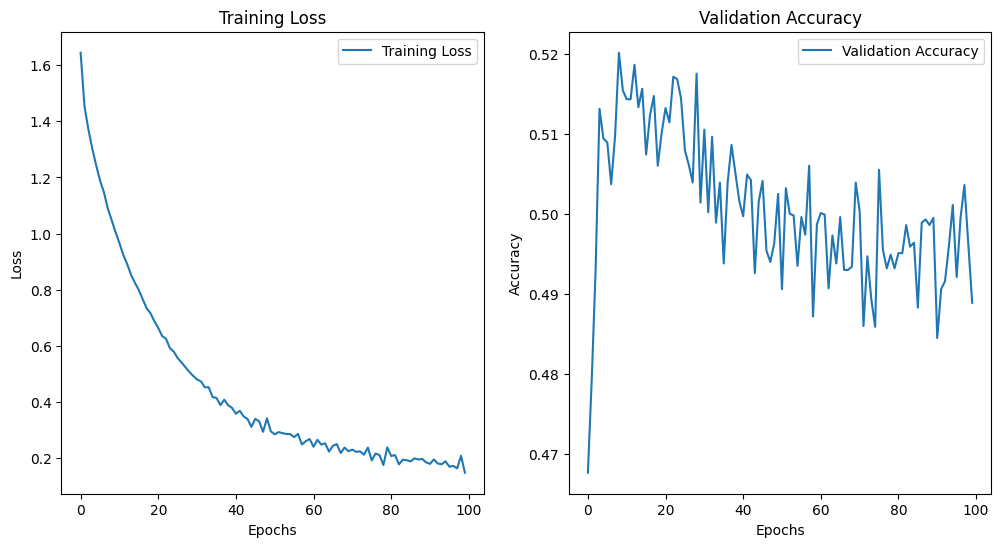

Final Test Accuracy: 0.4889


In [16]:
#Problem 3 Create a fully connected Neural Network for all 10 classes in CIFAR-10 with only one hidden layer with the size of 256
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
batch_size = 64
learning_rate = 0.001
num_epochs = 100
hidden_layer_size = 256

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = 3 * 32 * 32  # CIFAR-10 images are 32x32x3
num_classes = 10

model = CIFAR10NN(input_size, hidden_layer_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Neural Network Class
class CIFAR10NN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(CIFAR10NN, self).__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),              # Flatten the image into a vector
            nn.Linear(input_size, hidden_size),  # Hidden layer
            nn.ReLU(),                 # ReLU activation
            nn.Linear(hidden_size, num_classes)  # Output layer
        )

    def forward(self, x):
        return self.fc(x)

# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_losses = []
    val_accuracies = []
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

# Evaluate on validation data
        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_accuracy = accuracy_score(all_labels, all_preds)
        val_accuracies.append(val_accuracy)
        if epoch % 10 == 0 or epoch == num_epochs -1:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {val_accuracy:.4f}")


    total_time = time.time() - start_time
    return train_losses, val_accuracies, total_time

# Train the model
train_losses, val_accuracies, training_time = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=test_loader,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=num_epochs
)

print(f"\nTraining Time: {training_time:.2f} seconds")


# Training and validation losses
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(range(len(train_losses)), train_losses, label='Training Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.legend()

ax2.plot(range(len(val_accuracies)), val_accuracies, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Validation Accuracy')
ax2.legend()

plt.show()

# Final evaluation on the test set
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

final_accuracy = accuracy_score(all_labels, all_preds)
print(f"Final Test Accuracy: {final_accuracy:.4f}")


Training the Extended Neural Network with Three Hidden Layers...
Epoch [1/100], Loss: 1.6558, Accuracy: 0.4681
Epoch [11/100], Loss: 0.8344, Accuracy: 0.5373
Epoch [21/100], Loss: 0.4941, Accuracy: 0.5153
Epoch [31/100], Loss: 0.3336, Accuracy: 0.5210
Epoch [41/100], Loss: 0.2507, Accuracy: 0.5261
Epoch [51/100], Loss: 0.1950, Accuracy: 0.5086
Epoch [61/100], Loss: 0.1743, Accuracy: 0.5172
Epoch [71/100], Loss: 0.1581, Accuracy: 0.5223
Epoch [81/100], Loss: 0.1372, Accuracy: 0.5183
Epoch [91/100], Loss: 0.1300, Accuracy: 0.5164
Epoch [100/100], Loss: 0.1115, Accuracy: 0.5198

Training Time: 2056.88 seconds


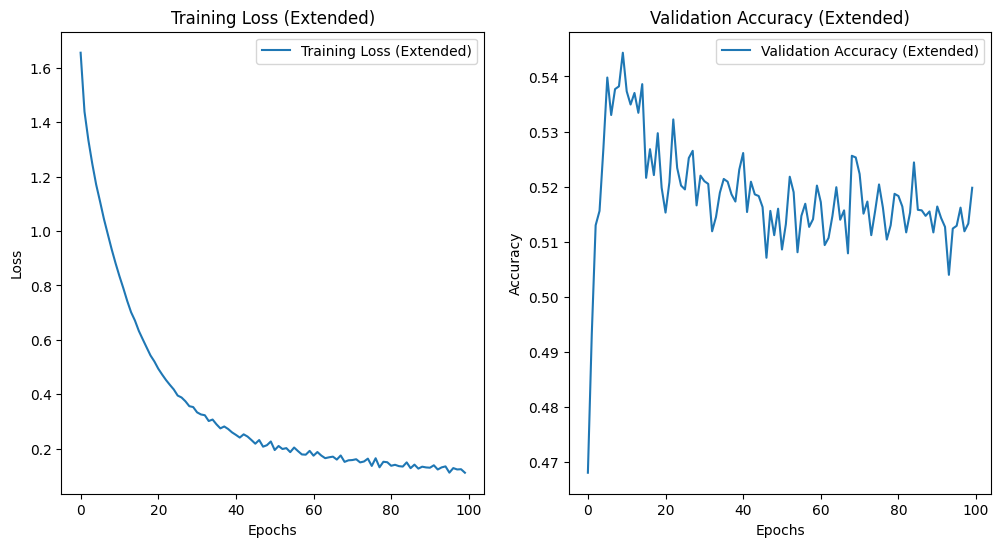

Final Test Accuracy (Extended): 0.5198


In [17]:
# Define the Neural Network with three hidden layers
class CIFAR10NN_Extended(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes):
        super(CIFAR10NN_Extended, self).__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),                            # Flatten the image into a vector
            nn.Linear(input_size, hidden_size1),     # First hidden layer
            nn.ReLU(),                               # Activation for first hidden layer
            nn.Linear(hidden_size1, hidden_size2),   # Second hidden layer
            nn.ReLU(),                               # Activation for second hidden layer
            nn.Linear(hidden_size2, hidden_size3),   # Third hidden layer
            nn.ReLU(),                               # Activation for third hidden layer
            nn.Linear(hidden_size3, num_classes)     # Output layer
        )

    def forward(self, x):
        return self.fc(x)


# Initialize the extended model, loss function, and optimizer
hidden_layer_size1 = 256
hidden_layer_size2 = 128
hidden_layer_size3 = 64

model_extended = CIFAR10NN_Extended(
    input_size=input_size,
    hidden_size1=hidden_layer_size1,
    hidden_size2=hidden_layer_size2,
    hidden_size3=hidden_layer_size3,
    num_classes=num_classes
).to(device)

criterion_extended = nn.CrossEntropyLoss()
optimizer_extended = optim.Adam(model_extended.parameters(), lr=learning_rate)

# Train the extended model
print("\nTraining the Extended Neural Network with Three Hidden Layers...")
train_losses_ext, val_accuracies_ext, training_time_ext = train_model(
    model=model_extended,
    train_loader=train_loader,
    val_loader=test_loader,
    criterion=criterion_extended,
    optimizer=optimizer_extended,
    num_epochs=num_epochs
)

print(f"\nTraining Time: {training_time_ext:.2f} seconds")

# Training and validation losses
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(range(len(train_losses_ext)), train_losses_ext, label='Training Loss (Extended)')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss (Extended)')
ax1.legend()

ax2.plot(range(len(val_accuracies_ext)), val_accuracies_ext, label='Validation Accuracy (Extended)')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Validation Accuracy (Extended)')
ax2.legend()
plt.show()

# Final evaluation on the test set for the extended model
model_extended.eval()
all_preds_ext = []
all_labels_ext = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs_ext = model_extended(images)
        _, preds_ext = torch.max(outputs_ext, 1)
        all_preds_ext.extend(preds_ext.cpu().numpy())
        all_labels_ext.extend(labels.cpu().numpy())

final_accuracy_ext = accuracy_score(all_labels_ext, all_preds_ext)
print(f"Final Test Accuracy (Extended): {final_accuracy_ext:.4f}")
